In [ ]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

In [ ]:
# Downloading the dataset
url_dataset = 'https://raw.githubusercontent.com/bonsai-lab-polimi/tnsm2024-data-centric/main/dataset_TNSM_06995_v2.csv'
data = pd.read_csv(url_dataset)

# Describing the dataset
print("Dataset Description:\n", data.describe())
print("Class Distribution:\n", data['label'].value_counts())

Dataset Description:
        alarm_0      alarm_1  alarm_2      alarm_3  alarm_4  alarm_5  alarm_6  \
count   1669.0  1669.000000   1669.0  1669.000000   1669.0   1669.0   1669.0   
mean       0.0    51.149790      0.0   200.959257      0.0      0.0      0.0   
std        0.0   204.292011      0.0   370.472581      0.0      0.0      0.0   
min        0.0     0.000000      0.0     0.000000      0.0      0.0      0.0   
25%        0.0     0.000000      0.0     0.000000      0.0      0.0      0.0   
50%        0.0     0.000000      0.0     0.000000      0.0      0.0      0.0   
75%        0.0     0.000000      0.0     0.000000      0.0      0.0      0.0   
max        0.0   900.000000      0.0   900.000000      0.0      0.0      0.0   

       alarm_7      alarm_8      alarm_9  ...  alarm_155    alarm_156  \
count   1669.0  1669.000000  1669.000000  ...     1669.0  1669.000000   
mean       0.0    27.455962     3.756741  ...        0.0   267.715398   
std        0.0   153.844771    55.3463

In [ ]:
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset, random_split

# Splitting input features (X) from target feature (y)
X = data.drop('label', axis=1).values
y = data['label'].values

# Feature normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dataframe to pytorch conversion of the dataset
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Creation of the "full" dataset, that will then be split in train, validation and test dataset
dataset = TensorDataset(X_tensor, y_tensor)

train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# DataLoader to load training, validation and test set
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch.nn.functional as F

# Neural network definition
# Change the hyperparameters, and call model = myNeuralNetwork(input_size, num_classes)
# instead of model = NeuralNetwork(input_size, num_classes) two cells below!
class myNeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, num_classes)
        self.dropout = nn.Dropout(0.5)
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.batch_norm2 = nn.BatchNorm1d(256)
        self.batch_norm3 = nn.BatchNorm1d(128)
        self.batch_norm4 = nn.BatchNorm1d(64)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.batch_norm1(x)
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.batch_norm2(x)
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.batch_norm3(x)
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.batch_norm4(x)
        x = self.dropout(x)
        x = self.fc5(x)
        return x



In [ ]:
# Professor's Neural network definition (try to beat it!)
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)  # Increased to 1024 neurons
        self.fc2 = nn.Linear(1024, 512)        # Increased to 512 neurons
        self.fc3 = nn.Linear(512, 256)         # Increased to 256 neurons
        self.fc4 = nn.Linear(256, 128)         # Increased to 128 neurons
        self.fc5 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)
        self.batch_norm1 = nn.BatchNorm1d(1024)
        self.batch_norm2 = nn.BatchNorm1d(512)
        self.batch_norm3 = nn.BatchNorm1d(256)
        self.batch_norm4 = nn.BatchNorm1d(128)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.batch_norm1(x)
        x = self.dropout(x)

        x = F.relu(self.fc2(x))
        x = self.batch_norm2(x)
        x = self.dropout(x)

        x = F.relu(self.fc3(x))
        x = self.batch_norm3(x)
        x = self.dropout(x)

        x = F.relu(self.fc4(x))
        x = self.batch_norm4(x)
        x = self.dropout(x)

        x = self.fc5(x)
        return x

In [ ]:
import torch.optim as optim

# Hyperparameters
input_size = X.shape[1]
num_classes = 4
num_epochs = 50
learning_rate = 10e-4

# Model, loss function, and optimizer initialization
model = NeuralNetwork(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training history (will be used to plot loss and accuracy)
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []


In [ ]:
# Training function
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    # Training history (Utilizzato per plottare poi loss e accuracy)
    train_loss_history.clear()
    train_acc_history.clear()
    val_loss_history.clear()
    val_acc_history.clear()

    # Best validation accuracy and test accuracy at best validation accuracy
    best_val_accuracy = 0
    test_accuracy_at_best_val = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_accuracy = correct / total

        # Append training history
        train_loss_history.append(epoch_loss)
        train_acc_history.append(epoch_accuracy)

        # Validation
        val_loss = 0.0
        correct = 0
        total = 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader.dataset)
        val_accuracy = correct / total

        # Append validation history
        val_loss_history.append(val_loss)
        val_acc_history.append(val_accuracy)

        # Check if this is the best validation accuracy
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Loss: {epoch_loss:.4f}, Acc: {epoch_accuracy:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}, '
              f'Best Val Acc: {best_val_accuracy:.4f}')


In [ ]:
# Calling the training function - training the model!
train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs)


Epoch [1/50], Loss: 0.9353, Acc: 0.6259, Val Loss: 0.4745, Val Acc: 0.8600, Best Val Acc: 0.8600
Epoch [2/50], Loss: 0.4803, Acc: 0.8339, Val Loss: 0.3406, Val Acc: 0.8800, Best Val Acc: 0.8800
Epoch [3/50], Loss: 0.3897, Acc: 0.8716, Val Loss: 0.3045, Val Acc: 0.9040, Best Val Acc: 0.9040
Epoch [4/50], Loss: 0.3340, Acc: 0.8947, Val Loss: 0.2610, Val Acc: 0.9160, Best Val Acc: 0.9160
Epoch [5/50], Loss: 0.2746, Acc: 0.9084, Val Loss: 0.2673, Val Acc: 0.9080, Best Val Acc: 0.9160
Epoch [6/50], Loss: 0.2431, Acc: 0.9178, Val Loss: 0.2597, Val Acc: 0.9080, Best Val Acc: 0.9160
Epoch [7/50], Loss: 0.2805, Acc: 0.9101, Val Loss: 0.2286, Val Acc: 0.9120, Best Val Acc: 0.9160
Epoch [8/50], Loss: 0.2599, Acc: 0.9101, Val Loss: 0.2158, Val Acc: 0.9280, Best Val Acc: 0.9280
Epoch [9/50], Loss: 0.2324, Acc: 0.9238, Val Loss: 0.1939, Val Acc: 0.9280, Best Val Acc: 0.9280
Epoch [10/50], Loss: 0.2019, Acc: 0.9315, Val Loss: 0.2406, Val Acc: 0.9200, Best Val Acc: 0.9280
Epoch [11/50], Loss: 0.2173, 

In [ ]:
# Function to plot loss
def plot_loss(train_loss_history, val_loss_history):
    plt.figure(figsize=(10, 5))
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train vs Validation Loss')
    plt.show()

# Function to plot accuracy
def plot_accuracy(train_acc_history, val_acc_history):
    plt.figure(figsize=(10, 5))
    plt.plot(train_acc_history, label='Train Accuracy')
    plt.plot(val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Train vs Validation Accuracy')
    plt.show()

In [ ]:
len(train_loss_history)

50

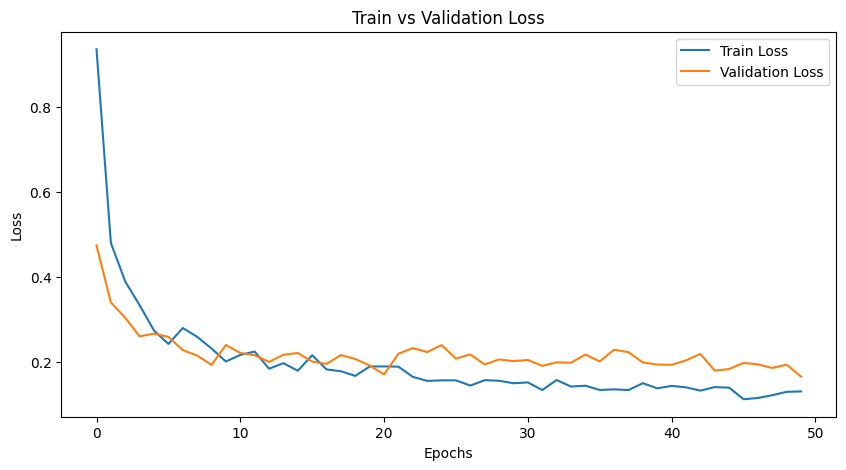

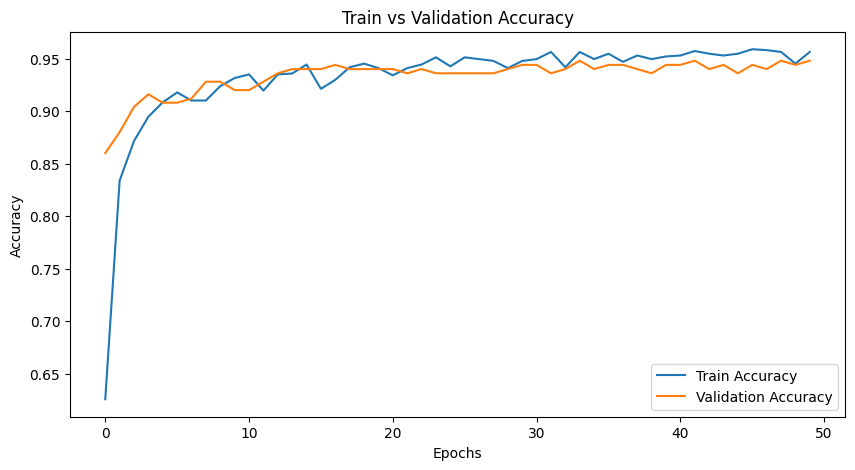

In [ ]:
# Plot the loss and accuracy
plot_loss(train_loss_history, val_loss_history)
plot_accuracy(train_acc_history, val_acc_history)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model (predict on test dataset)
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_preds

# Model evaluation
true_labels, predicted_labels = evaluate_model(model, test_loader)

# Classification report (sklearn)
print(classification_report(true_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.94      0.93      0.93        69
           1       0.97      0.98      0.98       101
           2       0.90      0.93      0.92        29
           3       0.96      0.94      0.95        52

    accuracy                           0.95       251
   macro avg       0.94      0.95      0.94       251
weighted avg       0.95      0.95      0.95       251



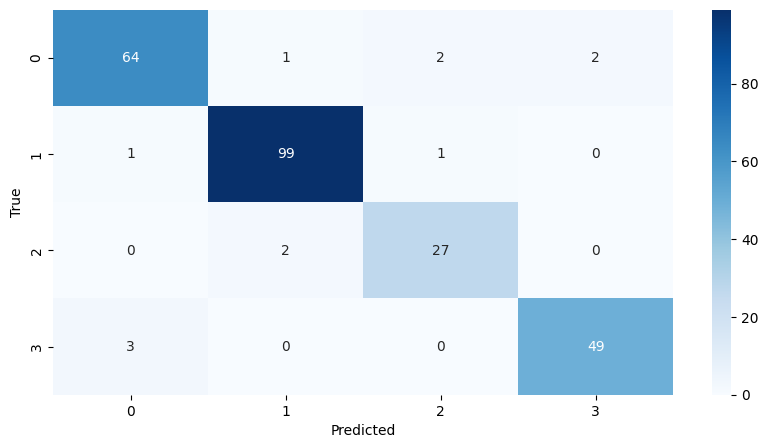

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Your turn now. Play with hyperparameters and try to beat my neural network!* ✌

In [ ]:
!pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.8 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from skopt import forest_minimize
from skopt.space import Real, Integer

# Neural network definition
class myNeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes, hidden_dims, dropout_prob):
        super(myNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.fc4 = nn.Linear(hidden_dims[2], hidden_dims[3])
        self.fc5 = nn.Linear(hidden_dims[3], num_classes)
        self.dropout = nn.Dropout(dropout_prob)
        self.batch_norm1 = nn.BatchNorm1d(hidden_dims[0])
        self.batch_norm2 = nn.BatchNorm1d(hidden_dims[1])
        self.batch_norm3 = nn.BatchNorm1d(hidden_dims[2])
        self.batch_norm4 = nn.BatchNorm1d(hidden_dims[3])

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.batch_norm1(x)
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.batch_norm2(x)
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.batch_norm3(x)
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.batch_norm4(x)
        x = self.dropout(x)
        x = self.fc5(x)
        return x

# Training function
# Same as the one provided by user

# Objective function for Bayesian optimization
def objective(params):
    learning_rate, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, dropout_prob = params

    hidden_dims = [hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4]

    # Model, loss function, and optimizer initialization
    model = myNeuralNetwork(input_size, num_classes, hidden_dims, dropout_prob)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train model
    train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs)

    # Record final validation accuracy
    final_val_accuracy = val_acc_history[-1]

    # Store parameter combination and final validation accuracy
    param_results.append((params, final_val_accuracy))

    # Return negative validation accuracy (as we are minimizing)
    return -final_val_accuracy

# Search space
space = [
    Real(1e-5, 1e-3, name='learning_rate', prior='log-uniform'),
    Integer(128, 1024, name='hidden_dim1'),
    Integer(64, 512, name='hidden_dim2'),
    Integer(32, 256, name='hidden_dim3'),
    Integer(16, 128, name='hidden_dim4'),
    Real(0.1, 0.7, name='dropout_prob')
]

# Store results for each parameter combination
param_results = []

# Perform Bayesian optimization
res = forest_minimize(objective, space, n_calls=20, random_state=42)

# Get best parameters
best_params = res.x
learning_rate, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, dropout_prob = best_params

print("Best parameters:")
print(f"Learning rate: {learning_rate}")
print(f"Hidden dimensions: [{hidden_dim1}, {hidden_dim2}, {hidden_dim3}, {hidden_dim4}]")
print(f"Dropout probability: {dropout_prob}")

# Summary of best parameters
print("\nSummary of the best parameters found:")
print(f"- Optimized Learning Rate: {learning_rate}")
print(f"- Optimized Hidden Layer Dimensions: {hidden_dim1}, {hidden_dim2}, {hidden_dim3}, {hidden_dim4}")
print(f"- Optimized Dropout Probability: {dropout_prob}")
print(f"- Number of Epochs: {num_epochs}")

# Print final validation accuracy for each parameter combination
print("\nFinal Validation Accuracy for each parameter combination:")
for params, val_accuracy in param_results:
    print(f"Parameters: learning_rate={params[0]}, hidden_dims={params[1:5]}, dropout_prob={params[5]}, Final Validation Accuracy: {val_accuracy}")

# Train final model with best parameters
hidden_dims = [hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4]
model = myNeuralNetwork(input_size, num_classes, hidden_dims, dropout_prob)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs)

Epoch [1/50], Loss: 1.4534, Acc: 0.3065, Val Loss: 1.1665, Val Acc: 0.5760, Best Val Acc: 0.5760
Epoch [2/50], Loss: 1.1341, Acc: 0.5214, Val Loss: 0.8883, Val Acc: 0.7400, Best Val Acc: 0.7400
Epoch [3/50], Loss: 0.9364, Acc: 0.6455, Val Loss: 0.7059, Val Acc: 0.7840, Best Val Acc: 0.7840
Epoch [4/50], Loss: 0.7673, Acc: 0.7329, Val Loss: 0.5594, Val Acc: 0.8360, Best Val Acc: 0.8360
Epoch [5/50], Loss: 0.6377, Acc: 0.7988, Val Loss: 0.4810, Val Acc: 0.8400, Best Val Acc: 0.8400
Epoch [6/50], Loss: 0.5650, Acc: 0.8176, Val Loss: 0.4201, Val Acc: 0.8680, Best Val Acc: 0.8680
Epoch [7/50], Loss: 0.5006, Acc: 0.8442, Val Loss: 0.3862, Val Acc: 0.8880, Best Val Acc: 0.8880
Epoch [8/50], Loss: 0.4413, Acc: 0.8707, Val Loss: 0.3554, Val Acc: 0.8840, Best Val Acc: 0.8880
Epoch [9/50], Loss: 0.4315, Acc: 0.8587, Val Loss: 0.3389, Val Acc: 0.8920, Best Val Acc: 0.8920
Epoch [10/50], Loss: 0.4142, Acc: 0.8647, Val Loss: 0.3215, Val Acc: 0.9080, Best Val Acc: 0.9080
Epoch [11/50], Loss: 0.3569, 